In [1]:
import numpy as np
import random

from sklearn import model_selection
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Задание 1:** К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

**Задание 2:** К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

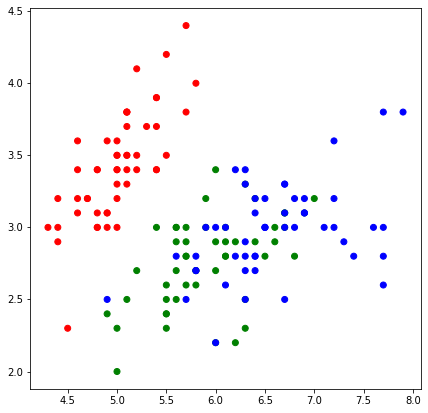

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def knn(x_train, y_train, x_test, k, weights=None, q=0.5):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        if weights == 'number_v1':
            i = 1
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += 1 / i
                i += 1
                
        if weights == 'number_v2':
            i = 1
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += (k - i + 1) / k
                i += 1        
                
        elif weights == 'distance':
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += q ** d[0]
                
        else:
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
def get_graph(X_train, y_train, k, weights=None):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = 0.02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, weights)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'Трехклассовая kNN классификация при k = {k} и "{weights}" весах')
    plt.show()

In [9]:
weights_range = ['number_v1', 'number_v2', 'distance', None]

**Методы взвешенного голосования:**

"number_v1": $w(i) = \frac{1}{i}$

"number_v2": $w(i) = \frac{k - i + 1}{k}$

"distance": $w(d) = q^{d}$,   $q \in (0,1)$



Точность алгоритма при k = 10 и "number_v1" весах: 0.867


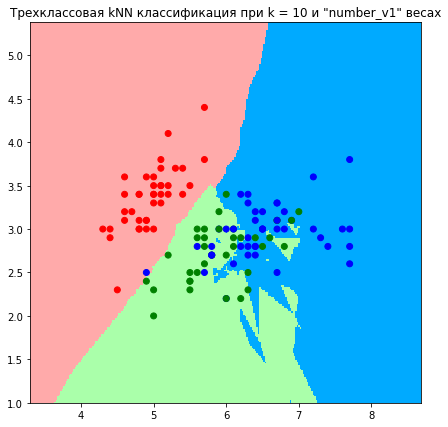


Точность алгоритма при k = 10 и "number_v2" весах: 0.867


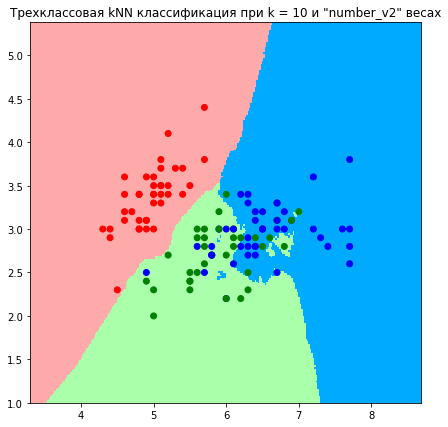


Точность алгоритма при k = 10 и "distance" весах: 0.867


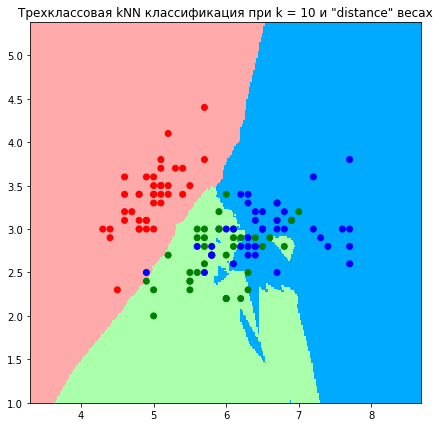


Точность алгоритма при k = 10 и "None" весах: 0.833


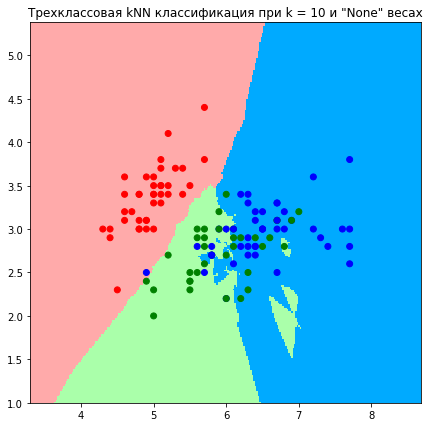

In [10]:
k = 10

for weights in weights_range:
    
    y_pred = knn(X_train, y_train, X_test, k, weights, q=0.5)
    score = accuracy(y_pred, y_test)

    print(f'\nТочность алгоритма при k = {k} и "{weights}" весах: {score:.3f}')
    
    get_graph(X_train, y_train, k, weights)

При $k=10$ точность алгоритма совпадает у всех трех методов взвешенного голосования, без взвешивания значение accuracy чуть меньше. С точки зрения сложность разделяющей гиперплоскости наиболее оптимальный вариант у метода "number_v2".


Точность алгоритма при k = 2 и "number_v1" весах: 0.667


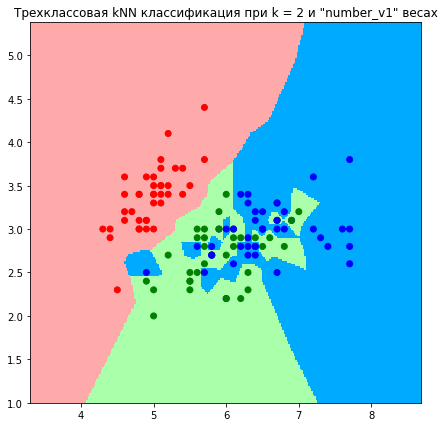


Точность алгоритма при k = 2 и "number_v2" весах: 0.667


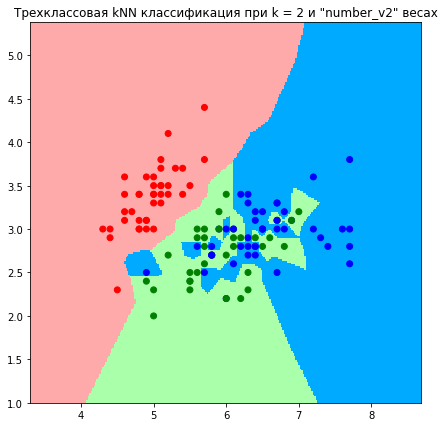


Точность алгоритма при k = 2 и "distance" весах: 0.733


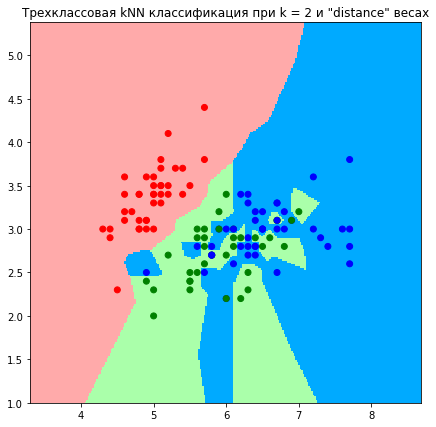


Точность алгоритма при k = 2 и "None" весах: 0.667


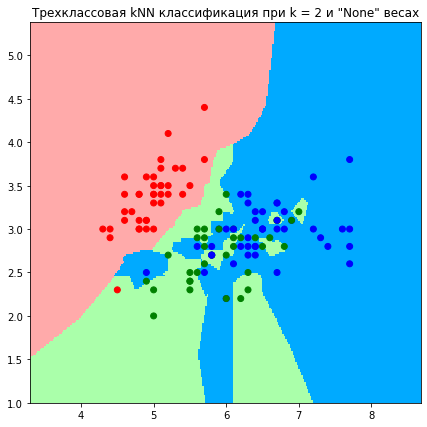

In [11]:
k = 2

for weights in weights_range:
    
    y_pred = knn(X_train, y_train, X_test, k, weights, q=0.5)
    score = accuracy(y_pred, y_test)

    print(f'\nТочность алгоритма при k = {k} и "{weights}" весах: {score:.3f}')
    
    get_graph(X_train, y_train, k, weights)

При $k=2$ лучший результат у метода взвешенного голосования по расстоянию до соседей.

**Задание 3:** Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

In [12]:
def optimal_k(k):
    
    for weights in weights_range:

        scores = []
        for k in range(k):
            k += 1

            y_pred = knn(X_train, y_train, X_test, k, weights, q=0.5)
            score = accuracy(y_pred, y_test)
            scores.append(score)
            
        plt.xlabel('k')
        plt.ylabel('accuracy')

        plt.plot(np.arange(1, k + 1), scores)
        plt.title(f'weights = {weights}')
        plt.grid()
        plt.show()

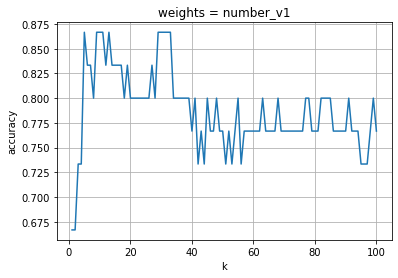

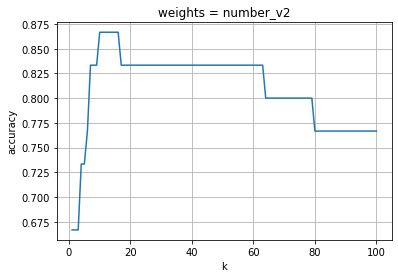

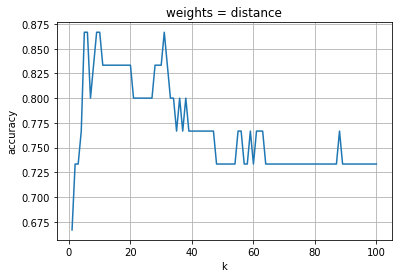

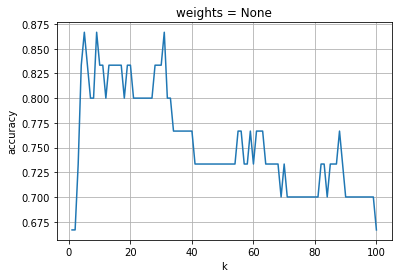

In [13]:
optimal_k(100)

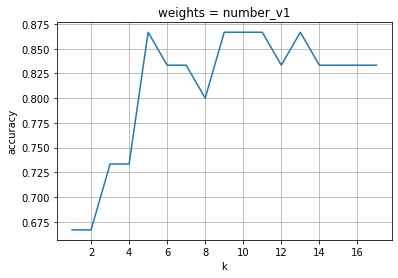

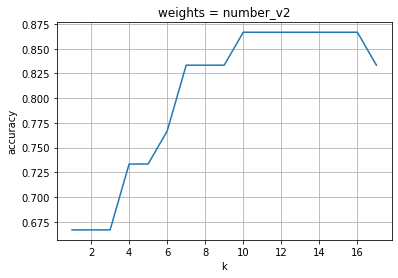

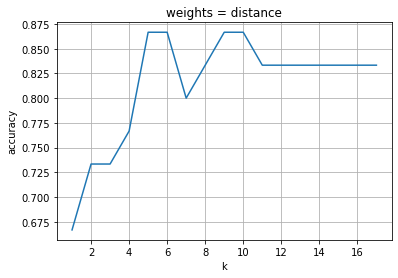

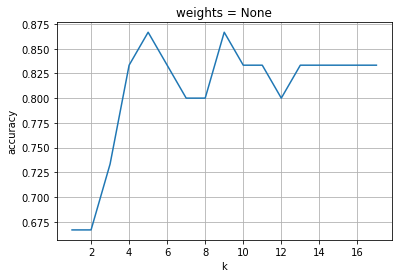

In [14]:
optimal_k(17)

Оптимальные значения для каждого из методов голосования лежат в промежутке от 5 до 10 ближайших соседей.

**Задание 4: (опция)** Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [15]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=1)

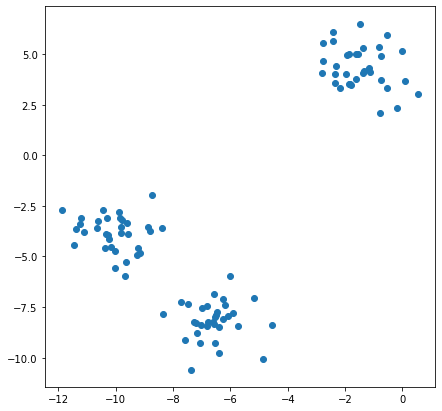

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [17]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [18]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

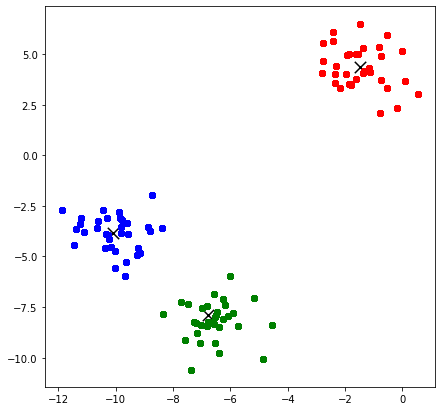

In [19]:
centroids, classes = kmeans(X, k=3, max_iterations=10, min_distance=1e-4)

visualize(centroids, classes)

In [20]:
def kmeans_metric(n_clusters, max_iterations):
    scores = []

    for k in range(n_clusters):
        k += 1

        centroids, classes = kmeans(X, k, max_iterations, min_distance=1e-4)

        norms = []
        for i in range(len(centroids)):
            norms.append(np.linalg.norm(classes[i] - centroids[i], ord='fro'))
        norm = np.mean(norms)
        scores.append(norm)

    plt.figure(figsize=(10, 5))

    plt.xlabel('k')
    plt.ylabel('kmeans_metric')

    plt.plot(np.arange(1, n_clusters + 1), scores)
    plt.grid()
    plt.show()

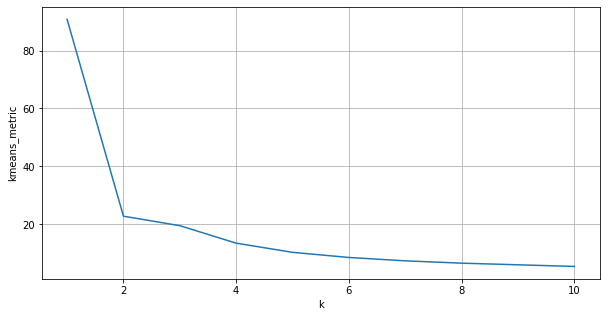

In [21]:
kmeans_metric(10, 5)

Все-таки в алгоритме, видимо, есть неточность. Кривая метрики не должна так сильно отклоняться при увеличении максимального количества итераций:

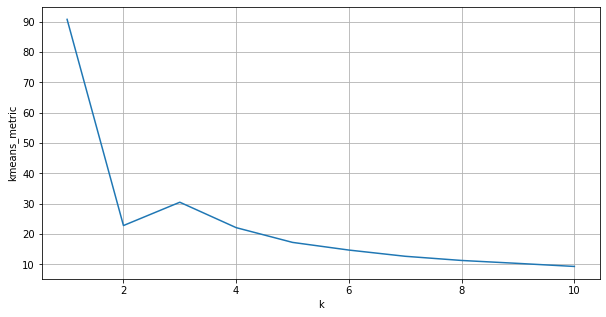

In [22]:
kmeans_metric(10, 15)

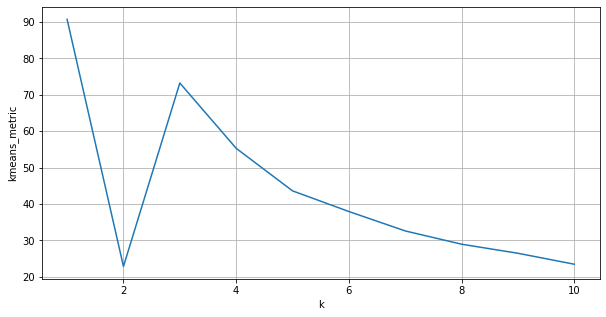

In [23]:
kmeans_metric(10, 100)

На данном датасете, наоборот, оптимальным является $k = 3$, поэтому график не должен увеличиваться при переходе от $k = 2$ до $k = 3$.